In [1]:
import numpy as np
import cv2
import colorsys
import random

In [2]:
def random_colors(N, bright=True):
    """
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    colors = [(int(i[0] * 255), int(i[1] * 255), int(i[2] * 255)) for i in colors]
    random.shuffle(colors)
    return colors
    

In [101]:
growed_masks = np.load("../test_data/test_imgs_multi_with_nuclei/outputs/17grow_15.npy")
mask = np.load("../test_data/test_imgs_multi_with_nuclei/outputs/17.npy")

In [102]:
res = []
blank = np.zeros((756, 672,3))

colors = random_colors(3000)
for i in range(1,len(np.unique(mask)) - 1):

    _mask = np.array((mask == i)*255, dtype = "uint8")
    

    checked_cnts = []
    contours,hierarchy = cv2.findContours(_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    for cnt in contours:
        mask_area = cv2.contourArea(cnt)

        if mask_area > 10:
            checked_cnts.append(cnt)
        else:
            print("No. {} less than 10".format(i), mask_area)
    cv2.drawContours(blank, checked_cnts , -1, colors[i])

    res.extend(checked_cnts)
    

No. 751 less than 10 0.0
No. 751 less than 10 0.0


In [103]:
cv2.imwrite("XDAS.png",blank)

True

In [104]:
mask = mask.astype('uint8')

In [105]:
colors = random_colors(len(np.unique(growed_masks)))

for i in range(1,len(np.unique(growed_masks)) - 1):
    _mask = np.array((growed_masks == i)*255, dtype = "uint8")
    
    ### for fuse
    tmp = cv2.bitwise_and(_mask, mask)
    
    if not np.any(tmp>0):

    ###
        checked_cnts = []
        contours,hierarchy = cv2.findContours(_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


        for cnt in contours:
            mask_area = cv2.contourArea(cnt)

            if mask_area > 50:
                checked_cnts.append(cnt)
            else:
                print("No. {} less than 50".format(i), mask_area)
        cv2.drawContours(blank, checked_cnts , -1, colors[i])

        res.extend(checked_cnts)

In [106]:
cv2.imwrite("XDAS.png",blank)

True

## fuse and save to npy (for )

In [112]:
import matplotlib.pyplot as plt
def plot_fig(pred, gt):
    # plt.imshow(gt)
    fig = plt.figure(figsize=(15,15))

    #f, axarr = plt.subplots(1,2)
    # Adds a subplot at the 1st position
    fig.add_subplot(1, 2, 1)

    # showing image
    plt.imshow(pred)
    plt.axis('off')
    plt.title("pred")

    # Adds a subplot at the 2nd position
    fig.add_subplot(1, 2, 2)

    # showing image
    plt.imshow(gt)
    plt.axis('off')
    plt.title("ground_truth")

    plt.show()

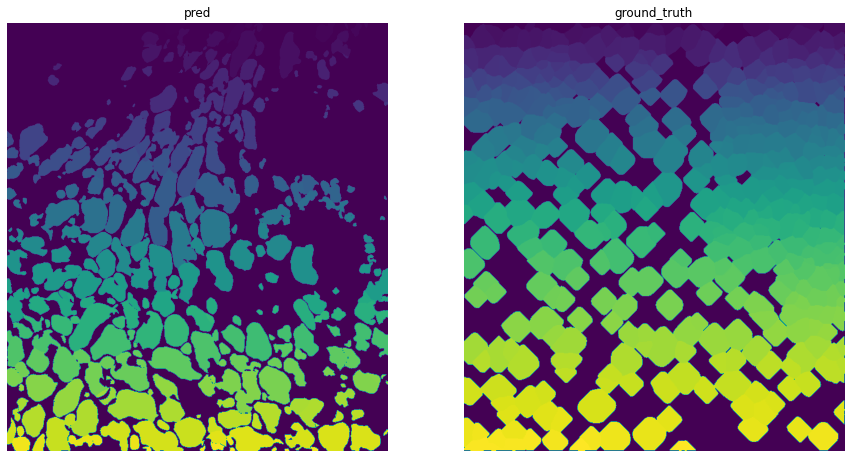

In [121]:
growed_masks = np.load("../test_data/test_imgs_multi_with_nuclei/outputs/23grow_15.npy")
mask = np.load("../test_data/test_imgs_multi_with_nuclei/outputs/23.npy")

plot_fig(mask, growed_masks)

for_bit_op_mask = np.load("../test_data/test_imgs_multi_with_nuclei/outputs/23.npy").astype('uint8')

for i in range(1,len(np.unique(growed_masks)) - 1):
    _mask = np.array((growed_masks == i)*255, dtype = "uint8")
    
    ### for fuse
    tmp = cv2.bitwise_and(_mask, for_bit_op_mask)
    
    if not np.any(tmp>0):
        mask[_mask>0] = (mask.max()+1)

np.save("../test_data/test_imgs_multi_with_nuclei/outputs/23_fuse.npy",mask)

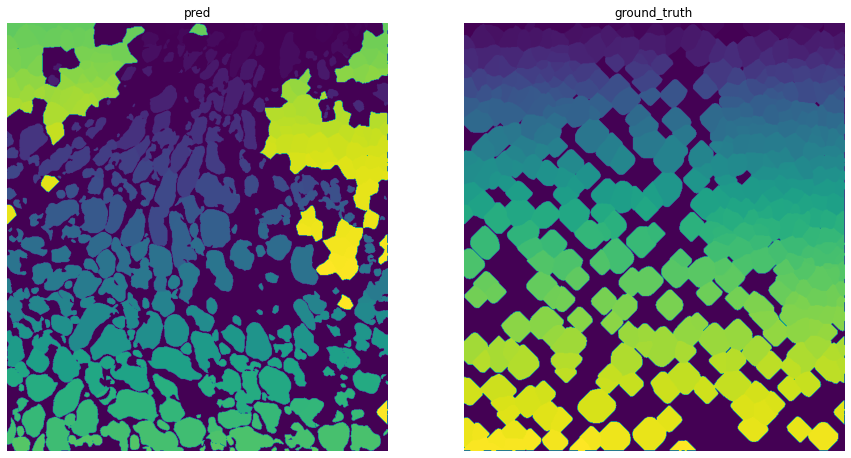

In [122]:
plot_fig(mask, growed_masks)
